<a href="https://colab.research.google.com/github/patriciasandagorda/labo2025v/blob/main/src/workflows/ComparandoGanancias_experimentoCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparando Ganancias




## Inicializacion

Esta parte se debe correr con el runtime en lenguaje **R** Ir al menu, Runtime -> Change Runtime Type -> Runtime type -> R

limpio el ambiente de R

In [ ]:
format(Sys.time(), "%a %b %d %X %Y")

[1] "Fri Nov 21 07:40:51 PM 2025"

In [ ]:
# limpio la memoria
rm(list=ls(all.names=TRUE)) # remove all objects
gc(full=TRUE, verbose=FALSE) # garbage collection

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,660355,35.3,1454500,77.7,1454500,77.7
Vcells,1226516,9.4,8388608,64.0,1975136,15.1


In [ ]:
require("data.table")

if( !require("R.utils")) install.packages("R.utils")
require("R.utils")

Loading required package: data.table

Loading required package: R.utils

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘R.utils’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.utils

Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.27.1 (2025-05-02 21:00:05 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.13.0 (2025-02-24 21:20:02 UTC) successfully loaded. See ?R.utils for help.




In [2]:

ML999961 = c(7266, 7346, 6925, 6645, 7165, 6875, 7045)
ML999959 = c(7316, 7396, 7105, 6735, 6435, 6215, 6335)
ML111119 = c(7346, 7436, 7145, 7205, 7726, 7406, 7095)
ML111521 = c(7646, 7706, 7436, 7456, 7175, 6825, 6455)
ML112831 = c(7276, 6975, 6615, 6345, 6455, 6585, 7095)

EC999961 = c(6935, 7045, 7135, 7125, 7165, 7306, 7085)
EC999959 = c(6485, 6645, 6295, 7075, 6775, 6505, 6635)
EC111119 = c(7606, 8066, 8176, 7896, 7996, 8066, 8597)
EC111521 = c(6135, 5854, 5984, 5674, 6485, 7035, 6695)
EC112831 = c(7396, 7416, 7456, 7536, 7235, 7736, 7436)

NO999961 = c(6485, 6195,6305, 6024,6095,6565,6595)
NO999959 = c(6985, 7085,6755, 6445,6205,6295,6265)
NO111119 = c(6955, 6645,7956, 7606,7316,7055,6685)
NO111521 = c(6965, 6535,6305, 7155,7235,6855,6555)
NO112831 = c(7005, 6725,6395, 6405,6855,6555,6635)

MI999961 = c(6465, 6595,7115, 7215,6875,6885,7386)
MI999959 = c(5844, 6315,6345, 6475,6175,7005,6715)
MI111119 = c(6495, 7346,6925, 6645,7165,6875,7045)
MI111521 = c(6935, 7376,7135, 7235,7396,7826,7836)
MI112831 = c(6925, 6655,6295, 6485,6565,6255,6305)

gananciaML = c(ML999961,ML999959,ML111119,ML111521,ML112831)
gananciaEC = c(EC999961,EC999959,EC111119,EC111521,EC112831)
gananciaNO = c(NO999961,NO999959,NO111119,NO111521,NO112831)
gananciaMI = c(MI999961,MI999959,MI111119,MI111521,MI112831)


In [8]:
# 1  ->  el modelo 1 es mejor
# 2  ->  el modelo 2 es mejor
# 0  ->  No se pudo determinar con el tope de qsemillas_tope

wt1 = wilcox.test(gananciaML, gananciaEC, paired = TRUE)
pvalue = wt1$p.value
out = 0
  if( pvalue < 0.05 & mean(gananciaML) > mean(gananciaEC)  )  out <- 1
  if( pvalue < 0.05 & mean(gananciaML) < mean(gananciaEC)  )  out <- 2

if(out == 0)
  paste0("No se pudo determinar cual es mejor")

if(out == 1)
  paste0("El modelo 1 es mejor")

if(out == 2)
  paste0("El modelo 2 es mejor")

Warning message in wilcox.test.default(gananciaML, gananciaEC, paired = TRUE):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(gananciaML, gananciaEC, paired = TRUE):
“cannot compute exact p-value with zeroes”


[1] "No se pudo determinar cual es mejor"

In [9]:
wt2 = wilcox.test(gananciaML, gananciaNO, paired = TRUE)
pvalue = wt2$p.value
out = 0
  if( pvalue < 0.05 & mean(gananciaML) > mean(gananciaNO)  )  out <- 1
  if( pvalue < 0.05 & mean(gananciaML) < mean(gananciaNO)  )  out <- 2

if(out == 0)
  paste0("No se pudo determinar cual es mejor")

if(out == 1)
  paste0("El modelo 1 es mejor")

if(out == 2)
  paste0("El modelo 2 es mejor")

Warning message in wilcox.test.default(gananciaML, gananciaNO, paired = TRUE):
“cannot compute exact p-value with ties”


[1] "El modelo 1 es mejor"

In [10]:
wt3 = wilcox.test(gananciaML, gananciaMI, paired = TRUE)
pvalue = wt3$p.value
out = 0
  if( pvalue < 0.05 & mean(gananciaML) > mean(gananciaMI)  )  out <- 1
  if( pvalue < 0.05 & mean(gananciaML) < mean(gananciaMI)  )  out <- 2

if(out == 0)
  paste0("No se pudo determinar cual es mejor")

if(out == 1)
  paste0("El modelo 1 es mejor")

if(out == 2)
  paste0("El modelo 2 es mejor")

Warning message in wilcox.test.default(gananciaML, gananciaMI, paired = TRUE):
“cannot compute exact p-value with ties”


[1] "El modelo 1 es mejor"

In [11]:
wt4 = wilcox.test(gananciaEC, gananciaNO, paired = TRUE)
pvalue = wt4$p.value
out = 0
  if( pvalue < 0.05 & mean(gananciaEC) > mean(gananciaNO)  )  out <- 1
  if( pvalue < 0.05 & mean(gananciaEC) < mean(gananciaNO)  )  out <- 2

if(out == 0)
  paste0("No se pudo determinar cual es mejor")

if(out == 1)
  paste0("El modelo 1 es mejor")

if(out == 2)
  paste0("El modelo 2 es mejor")

Warning message in wilcox.test.default(gananciaEC, gananciaNO, paired = TRUE):
“cannot compute exact p-value with ties”


[1] "El modelo 1 es mejor"

In [12]:
wt5 = wilcox.test(gananciaEC, gananciaMI, paired = TRUE)
pvalue = wt5$p.value
out = 0
  if( pvalue < 0.05 & mean(gananciaEC) > mean(gananciaMI)  )  out <- 1
  if( pvalue < 0.05 & mean(gananciaEC) < mean(gananciaMI)  )  out <- 2

if(out == 0)
  paste0("No se pudo determinar cual es mejor")

if(out == 1)
  paste0("El modelo 1 es mejor")

if(out == 2)
  paste0("El modelo 2 es mejor")

Warning message in wilcox.test.default(gananciaEC, gananciaMI, paired = TRUE):
“cannot compute exact p-value with ties”


[1] "No se pudo determinar cual es mejor"

In [13]:
wt6 = wilcox.test(gananciaNO, gananciaMI, paired = TRUE)
pvalue = wt6$p.value
out = 0
  if( pvalue < 0.05 & mean(gananciaNO) > mean(gananciaMI)  )  out <- 1
  if( pvalue < 0.05 & mean(gananciaNO) < mean(gananciaMI)  )  out <- 2

if(out == 0)
  paste0("No se pudo determinar cual es mejor")

if(out == 1)
  paste0("El modelo 1 es mejor")

if(out == 2)
  paste0("El modelo 2 es mejor")

Warning message in wilcox.test.default(gananciaNO, gananciaMI, paired = TRUE):
“cannot compute exact p-value with ties”


[1] "No se pudo determinar cual es mejor"

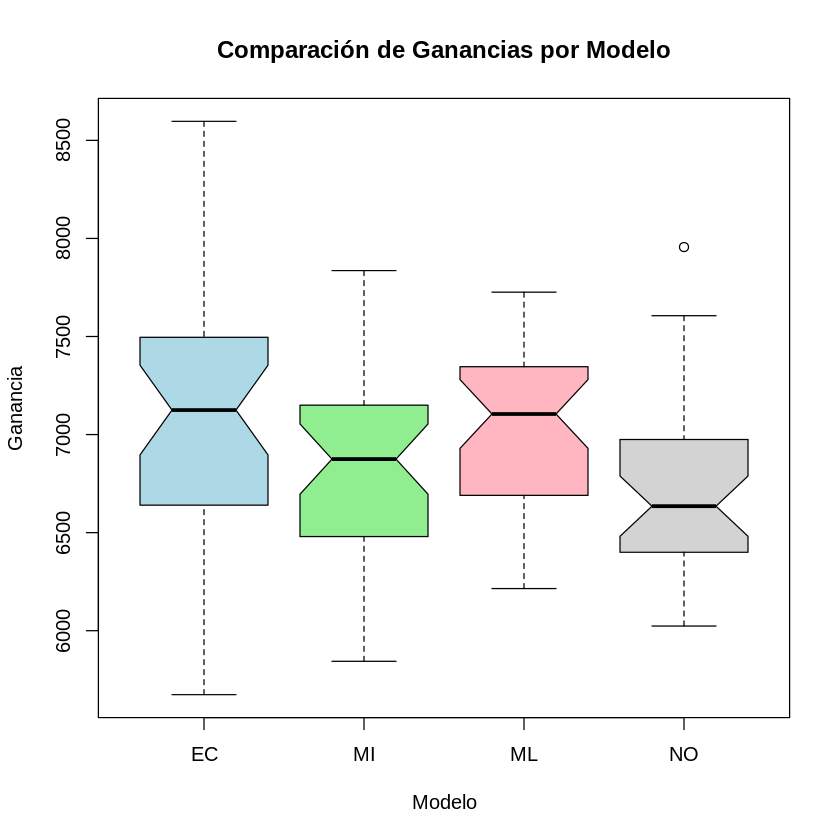

In [44]:
# Crear un data.frame largo para graficar
modelo <- c(
  rep("ML", length(gananciaML)),
  rep("EC", length(gananciaEC)),
  rep("NO", length(gananciaNO)),
  rep("MI", length(gananciaMI))
)

ganancia <- c(gananciaML, gananciaEC, gananciaNO, gananciaMI)

df <- data.frame(modelo, ganancia)

# Boxplot
boxplot(ganancia ~ modelo, data = df,
        col = c("lightblue", "lightgreen", "lightpink", "lightgray"),
        main = "Comparación de Ganancias por Modelo",
        xlab = "Modelo",
        ylab = "Ganancia",
        border = "black",
        notch = TRUE)

In [43]:
png("grafico_alargado.png", width = 3000, height = 800, res = 120)
plot(x, gananciaML, type="b", pch=10, col="blue", cex=0.6,lwd=3,
     xlab="Observación",
     ylab="Ganancia",
     main="Ganancias por Modelo (Puntos + Líneas)",
     ylim = range(c(gananciaML, gananciaEC, gananciaNO, gananciaMI)))

lines(x, gananciaEC, type="b", pch=10, col="red", cex=0.6)
lines(x, gananciaNO, type="b", pch=10, col="darkgreen", cex=0.6)
lines(x, gananciaMI, type="b", pch=10, col="purple", cex=0.6)

legend("topleft",
       legend = c("ML", "EC", "NO", "MI"),
       col = c("blue", "red", "darkgreen", "purple"),
       pch = 19, lty = 1)
dev.off()

agg_record_1643913343 
                    2